In [227]:
import math
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
import urllib2, requests
from bs4 import BeautifulSoup
import matplotlib.pyplot
from sklearn import linear_model
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

In [137]:
def extract_text(el):
    if el:
        return el.text.strip()
    else:
        return ''      

def get_price_from_result(result):
    return extract_text(result.find('div', {'class' : 'price'}))

def get__vechile_from_result(result):
    return extract_text(result.find('div', {'class' : 'vehicle-features'}))

def get_make_from_result(result):
    return extract_text(result.find('div', {'class' : 'n_width-max title '}))

def get_location_from_result(result):
    return extract_text(result.find('span', {'class' : 'state'}))

def get_summary_from_result(result):
    return extract_text(result.find('div', {'class' : 'comments'}))

    return None


In [ ]:
http://www.carsales.com.au/cars/results?setype=pagination&q=%28And.Service.Carsales._.FuelEconomy.4L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodel

In [143]:
# url_template = "http://www.carsales.com.au/cars/results?offset={}&setype=pagination&q=%28And.Service.Carsales._.FuelEconomy.{}.%29&WT.z_srchsrcx=makemodel"
#"http://www.carsales.com.au/car/{}/?WT.z_srchsrcx=makemodel"
max_results_per_state = 1 # Set this to a high-value (5000) to generate more results. 

# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

#city = elem.find('span', attrs={'itemprop':'addressLocality'}).getText()

rows = []
bigger_rows = []
for state in range(12,613,12):#, '5L/100km or less', '7L/100km or less', '9L/100km or less', '11L/100km or less', '11L/100km or more']):
    for start in set([ '4L%2F100km%20or%20less']): 
        r = requests.get(url_template.format(state, start))
        print url_template.format(state, start)
        soup = BeautifulSoup(r.content) 
        results = soup.findAll('div', { "class" : "listing-item n_margin-20 special " })
        for result in results:
            if result:
                row = {}
                row['make'] = get_make_from_result(result)
                row['price'] = get_price_from_result(result)
                row['vechile features'] =get__vechile_from_result(result)
                row['location'] = get_location_from_result(result)
                row['fuel_efficiency'] = start
                rows.append(row)

   

 

http://www.carsales.com.au/cars/results?offset=12&setype=pagination&q=%28And.Service.Carsales._.FuelEconomy.4L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodel
http://www.carsales.com.au/cars/results?offset=24&setype=pagination&q=%28And.Service.Carsales._.FuelEconomy.4L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodel
http://www.carsales.com.au/cars/results?offset=36&setype=pagination&q=%28And.Service.Carsales._.FuelEconomy.4L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodel
http://www.carsales.com.au/cars/results?offset=48&setype=pagination&q=%28And.Service.Carsales._.FuelEconomy.4L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodel
http://www.carsales.com.au/cars/results?offset=60&setype=pagination&q=%28And.Service.Carsales._.FuelEconomy.4L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodel
http://www.carsales.com.au/cars/results?offset=72&setype=pagination&q=%28And.Service.Carsales._.FuelEconomy.4L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodel
http://www.carsales.com.au/cars/results?offset

In [44]:
result1 = pd.read_csv('cars_1000.csv', delimiter=',', index_col=0)
result1

,fuel_efficiency,location,make,price,vechile features
0,7L/100km or less,|\r\nQLD,2003 Hyundai Accent GL Manual,"$3,999*","Odometer\r\n151,483 km\r\n\r\n\r\nBody\r\nHatc..."
1,7L/100km or less,|\r\nNSW,2014 Holden Cruze Equipe JH Series II Manual \...,"$15,890*","Odometer\r\n25,053 km\r\n\r\n\r\nBody\r\nSedan..."
2,7L/100km or less,|\r\nQLD,2016 Subaru Impreza 2.0i G4 Auto AWD \r\r\n ...,"$24,987",Odometer\r\n10 km\r\n\r\n\r\nBody\r\nHatch\r\n...
3,7L/100km or less,|\r\nVIC,2016 Mazda 2 Neo DJ Series Manual,"$13,500*",Odometer\r\n114 km\r\n\r\n\r\nBody\r\nHatch\r\...
4,7L/100km or less,|\r\nVIC,2016 BMW 330i M Sport F30 LCI Auto,"$65,686","Odometer\r\n6,999 km\r\n\r\n\r\nBody\r\nSedan\..."
5,7L/100km or less,|\r\nQLD,2014 Audi Q5 TDI Auto quattro \r\r\n ...,"$53,000*","Odometer\r\n27,013 km\r\n\r\n\r\nBody\r\nSUV\r..."
6,7L/100km or less,|\r\nWA,2014 Toyota Corolla Ascent Auto,"$13,299*","Odometer\r\n53,217 km\r\n\r\n\r\nBody\r\nHatch..."
7,7L/100km or less,|\r\nNSW,2016 Mitsubishi Mirage ES LA Auto \r\r\n ...,"$12,887",Odometer\r\n0 km\r\n\r\n\r\nBody\r\nHatch\r\n\...
8,7L/100km or less,|\r\nQLD,2013 Audi A5 Sport Edition Auto \r\r\n ...,"$39,900*","Odometer\r\n31,000 km\r\n\r\n\r\nBody\r\nHatch..."
9,7L/100km or less,|\r\nNSW,2015 BMW X6 xDrive30d F16 Auto 4x4,"$123,880","Odometer\r\n4,949 km\r\n\r\n\r\nBody\r\nSUV\r\..."


In [4]:
cat4_premium = pd.read_csv('cars_cat_4_premium.csv' )
cat4_standard = pd.read_csv('cars_cat_4_standard.csv')
cat4_standard['fuel_efficiency'].replace("4L%2F100km%20or%20less", "4L/100km or less", inplace=True)
cat4_premium['fuel_efficiency'].replace("4L%2F100km%20or%20less", "4L/100km or less", inplace=True)

cat4_premium

,fuel_efficiency,location,make,price,vechile features
0,4L/100km or less,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\n ...,"$35,861",Odometer\r\n5 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\...
1,4L/100km or less,VIC,2016 BMW X5 xDrive40e F15 Auto 4x4,"$120,888","Odometer\r\n1,548 km\r\n\r\n\r\nBody\r\nSUV\r\..."
2,4L/100km or less,NSW,2009 MINI Hatch Cooper D Manual,"$13,800*","Odometer\r\n42,866 km\r\n\r\n\r\nBody\r\nHatch..."
3,4L/100km or less,TAS,2012 Toyota Prius C Auto,"$14,490*","Odometer\r\n85,865 km\r\n\r\n\r\nBody\r\nHatch..."
4,4L/100km or less,NSW,2016 BMW X5 xDrive40e F15 Auto 4x4,"$141,225","Odometer\r\n1,652 km\r\n\r\n\r\nBody\r\nSUV\r\..."
5,4L/100km or less,VIC,2015 Toyota Prius C i-Tech Auto,"$21,988","Odometer\r\n17,467 km\r\n\r\n\r\nBody\r\nHatch..."
6,4L/100km or less,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\n ...,"$30,790",Odometer\r\n19 km\r\n\r\n\r\nBody\r\nSUV\r\n\r...
7,4L/100km or less,VIC,NaN,"$91,860","Odometer\r\n2,565 km\r\n\r\n\r\nBody\r\nSedan\..."
8,4L/100km or less,NSW,NaN,"$73,800","Odometer\r\n11,768 km\r\n\r\n\r\nBody\r\nSedan..."
9,4L/100km or less,VIC,2016 BMW 118d Sport Line F20 LCI Auto,"$51,900","Odometer\r\n3,933 km\r\n\r\n\r\nBody\r\nHatch\..."


In [5]:
frames = [cat4_premium, cat4_standard, result1]
result = pd.concat(frames, ignore_index=True)
result

,fuel_efficiency,location,make,price,vechile features
0,4L/100km or less,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\n ...,"$35,861",Odometer\r\n5 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\...
1,4L/100km or less,VIC,2016 BMW X5 xDrive40e F15 Auto 4x4,"$120,888","Odometer\r\n1,548 km\r\n\r\n\r\nBody\r\nSUV\r\..."
2,4L/100km or less,NSW,2009 MINI Hatch Cooper D Manual,"$13,800*","Odometer\r\n42,866 km\r\n\r\n\r\nBody\r\nHatch..."
3,4L/100km or less,TAS,2012 Toyota Prius C Auto,"$14,490*","Odometer\r\n85,865 km\r\n\r\n\r\nBody\r\nHatch..."
4,4L/100km or less,NSW,2016 BMW X5 xDrive40e F15 Auto 4x4,"$141,225","Odometer\r\n1,652 km\r\n\r\n\r\nBody\r\nSUV\r\..."
5,4L/100km or less,VIC,2015 Toyota Prius C i-Tech Auto,"$21,988","Odometer\r\n17,467 km\r\n\r\n\r\nBody\r\nHatch..."
6,4L/100km or less,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\n ...,"$30,790",Odometer\r\n19 km\r\n\r\n\r\nBody\r\nSUV\r\n\r...
7,4L/100km or less,VIC,NaN,"$91,860","Odometer\r\n2,565 km\r\n\r\n\r\nBody\r\nSedan\..."
8,4L/100km or less,NSW,NaN,"$73,800","Odometer\r\n11,768 km\r\n\r\n\r\nBody\r\nSedan..."
9,4L/100km or less,VIC,2016 BMW 118d Sport Line F20 LCI Auto,"$51,900","Odometer\r\n3,933 km\r\n\r\n\r\nBody\r\nHatch\..."


In [6]:
#cat_4 = pd.DataFrame.from_records(rows)
#cat_4.to_csv('cars_cat_4_premium.csv', encoding='utf-8', index=False)
#cat_4['vechile features'].value_counts()

In [7]:
#result[result.fuel_efficiency == '11L/100km or less']

In [8]:
result['price'].replace('', np.nan, inplace=True)
result['location'].replace('', np.nan, inplace=True)
result['make'].replace('', np.nan, inplace=True)
result['vechile features'].replace('', np.nan, inplace=True)
result.dropna(how='any',axis=0, inplace=True)
result.reset_index(drop = True, inplace=True)
result.replace('11L/100km or more','12',inplace=True)
result[result.fuel_efficiency == '12']

,fuel_efficiency,location,make,price,vechile features
26530,12,|\r\nNSW,2012 Jeep Grand Cherokee Overland Auto 4x4 \r\...,"$37,800*","Odometer\r\n81,594 km\r\n\r\n\r\nBody\r\nSUV\r..."
26531,12,|\r\nVIC,2011 Lexus IS F Auto \r\r\n ...,"$53,500*","Odometer\r\n109,500 km\r\n\r\n\r\nBody\r\nSeda..."
26532,12,|\r\nSA,2012 Holden Ute SS Thunder VE Series II Auto,"$27,488*","Odometer\r\n63,825 km\r\n\r\n\r\nBody\r\nUte\r..."
26533,12,|\r\nNSW,1983 Mercedes-Benz 380SL Auto,"$44,900*","Odometer\r\n237,350 km\r\n\r\n\r\nBody\r\nConv..."
26534,12,|\r\nVIC,2005 Mercedes-Benz SL350 Auto \r\r\n ...,"$36,888","Odometer\r\n116,230 km\r\n\r\n\r\nBody\r\nConv..."
26535,12,|\r\nNSW,2004 Lexus GS300 Auto \r\r\n ...,"$7,999*","Odometer\r\n106,000 km\r\n\r\n\r\nBody\r\nSeda..."
26536,12,|\r\nVIC,2015 Ford Falcon G6E Turbo FG X Auto,"$35,690","Odometer\r\n12,230 km\r\n\r\n\r\nBody\r\nSedan..."
26537,12,|\r\nACT,2007 Toyota Hiace LWB Manual,"$20,900*","Odometer\r\n128,800 km\r\n\r\n\r\nBody\r\nVan\..."
26538,12,|\r\nSA,2010 Holden Ute SS V Special Edition VE Auto \...,"$25,999*","Odometer\r\n96,095 km\r\n\r\n\r\nBody\r\nUte\r..."
26539,12,|\r\nVIC,2004 Mercedes-Benz CLK320 Elegance Auto,"$17,950*","Odometer\r\n130,095 km\r\n\r\n\r\nBody\r\nConv..."


Lets remove '$' sign and other characters from the rows:

In [9]:
result['location'] = result['location'].map(lambda x: x.lstrip('|\n'))
result['location'] = result['location'].map(lambda x: x.lstrip('\r\n'))
result['price'] = result['price'].map(lambda x: x.lstrip('$').rstrip('*'))
result['vechile features'] = result['vechile features'].map(lambda x: x.lstrip('Odometer\r\n'))
result['fuel_efficiency'].replace("11L/100km or less", "11", inplace=True)
result['fuel_efficiency'].replace("4L/100km or less", "4", inplace=True)
result['fuel_efficiency'].replace("5L/100km or less", "5", inplace=True)
result['fuel_efficiency'].replace('9L/100km or less', "9", inplace=True)
result['fuel_efficiency'].replace('7L/100km or less', "7", inplace=True)
result['fuel_efficiency'] = pd.to_numeric(result['fuel_efficiency'])
result[result.fuel_efficiency == 4]

,fuel_efficiency,location,make,price,vechile features
0,4,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\n ...,"35,861",5 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\n\r\nTransmi...
1,4,VIC,2016 BMW X5 xDrive40e F15 Auto 4x4,"120,888","1,548 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\n\r\nTra..."
2,4,NSW,2009 MINI Hatch Cooper D Manual,"13,800","42,866 km\r\n\r\n\r\nBody\r\nHatch\r\n\r\n\r\n..."
3,4,TAS,2012 Toyota Prius C Auto,"14,490","85,865 km\r\n\r\n\r\nBody\r\nHatch\r\n\r\n\r\n..."
4,4,NSW,2016 BMW X5 xDrive40e F15 Auto 4x4,"141,225","1,652 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\n\r\nTra..."
5,4,VIC,2015 Toyota Prius C i-Tech Auto,"21,988","17,467 km\r\n\r\n\r\nBody\r\nHatch\r\n\r\n\r\n..."
6,4,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\n ...,"30,790",19 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\n\r\nTransm...
7,4,VIC,2016 BMW 118d Sport Line F20 LCI Auto,"51,900","3,933 km\r\n\r\n\r\nBody\r\nHatch\r\n\r\n\r\nT..."
8,4,NSW,2013 Toyota Prius C Auto,"16,880","32,168 km\r\n\r\n\r\nBody\r\nHatch\r\n\r\n\r\n..."
9,4,NSW,2014 Mitsubishi Outlander PHEV Aspire ZJ Auto ...,"33,887","8,582 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\n\r\nTra..."


In [10]:
year = pd.DataFrame(result.make.str.split(' ',1).tolist(),
                  columns = ['year','car make'])

make = pd.DataFrame(year['car make'].str.split(' ',1).tolist(),
                  columns = ['car make','type'])
#make

In [11]:
#cleaning vechile features column
odometer = pd.DataFrame(result['vechile features'].str.split(' ',1).tolist(),
                  columns = ['odometer','features'])
odometer['features'] = odometer['features'].map(lambda x: x.lstrip('km\r\n\r\n\r\nBody\r\n'))
#odometer

In [12]:
body = pd.DataFrame(odometer.features.str.split('\r\n\r\n\r\n',1).tolist(),
                  columns = ['body','type'])
body['type'] = body['type'].map(lambda x: x.lstrip('Transmission\r\n'))
#body

In [13]:
transmission = pd.DataFrame(body['type'].str.split('\r\n\r\n\r\n',1).tolist(),
                  columns = ['transmission','data'])
transmission.data = transmission.data.map(lambda x: x.lstrip('Engine\r\n'))
#transmission

In [14]:
engine = pd.DataFrame(transmission.data.str.split(' ',1).tolist(),
                  columns = ['Number of cylinders','capacity'])
engine['Number of cylinders'] = engine['Number of cylinders'].map(lambda x: x.rstrip('cyl'))
#engine

In [15]:
capacity = pd.DataFrame(engine.capacity.str.split(' ',1).tolist(),
                  columns = ['capacity','fuel type'])
capacity['capacity'] = capacity['capacity'].map(lambda x: x.rstrip('L'))
#capacity

In [16]:
cars_data = pd.concat([result, make['car make'], make['type'], year.year, odometer.odometer, body.body, transmission.transmission, engine['Number of cylinders'],capacity.capacity, capacity['fuel type'] ], axis=1)

In [17]:
cars_data[(cars_data.location == 'VIC\r\nMornington') & (cars_data.price == '54,990')]

,fuel_efficiency,location,make,price,vechile features,car make,type,year,odometer,body,transmission,Number of cylinders,capacity,fuel type
939,7,VIC\r\nMornington,2015 Mercedes-Benz CLA200 Auto,"54,990","22,100 km\r\n\r\n\r\nBody\r\nCoupe\r\n\r\n\r\n...",Mercedes-Benz,CLA200 Auto,2015,"22,100",Coupe,Automatic,4,1.6,Turbo Petrol
983,7,VIC\r\nMornington,2015 Mercedes-Benz CLA200 Auto,"54,990","22,100 km\r\n\r\n\r\nBody\r\nCoupe\r\n\r\n\r\n...",Mercedes-Benz,CLA200 Auto,2015,"22,100",Coupe,Automatic,4,1.6,Turbo Petrol
1706,7,VIC\r\nMornington,2015 Mercedes-Benz CLA200 Auto,"54,990","22,100 km\r\n\r\n\r\nBody\r\nCoupe\r\n\r\n\r\n...",Mercedes-Benz,CLA200 Auto,2015,"22,100",Coupe,Automatic,4,1.6,Turbo Petrol
3071,7,VIC\r\nMornington,2015 Mercedes-Benz CLA200 Auto,"54,990","22,100 km\r\n\r\n\r\nBody\r\nCoupe\r\n\r\n\r\n...",Mercedes-Benz,CLA200 Auto,2015,"22,100",Coupe,Automatic,4,1.6,Turbo Petrol
3213,7,VIC\r\nMornington,2015 Mercedes-Benz CLA200 Auto,"54,990","22,100 km\r\n\r\n\r\nBody\r\nCoupe\r\n\r\n\r\n...",Mercedes-Benz,CLA200 Auto,2015,"22,100",Coupe,Automatic,4,1.6,Turbo Petrol
11162,9,VIC\r\nMornington,2015 Mercedes-Benz CLA200 Auto,"54,990","22,100 km\r\n\r\n\r\nBody\r\nCoupe\r\n\r\n\r\n...",Mercedes-Benz,CLA200 Auto,2015,"22,100",Coupe,Automatic,4,1.6,Turbo Petrol
11827,9,VIC\r\nMornington,2015 Mercedes-Benz CLA200 Auto,"54,990","22,100 km\r\n\r\n\r\nBody\r\nCoupe\r\n\r\n\r\n...",Mercedes-Benz,CLA200 Auto,2015,"22,100",Coupe,Automatic,4,1.6,Turbo Petrol
33614,11,VIC\r\nMornington,2015 Mercedes-Benz CLA200 Auto,"54,990","22,100 km\r\n\r\n\r\nBody\r\nCoupe\r\n\r\n\r\n...",Mercedes-Benz,CLA200 Auto,2015,"22,100",Coupe,Automatic,4,1.6,Turbo Petrol
34453,11,VIC\r\nMornington,2015 Mercedes-Benz CLA200 Auto,"54,990","22,100 km\r\n\r\n\r\nBody\r\nCoupe\r\n\r\n\r\n...",Mercedes-Benz,CLA200 Auto,2015,"22,100",Coupe,Automatic,4,1.6,Turbo Petrol
35206,11,VIC\r\nMornington,2015 Mercedes-Benz CLA200 Auto,"54,990","22,100 km\r\n\r\n\r\nBody\r\nCoupe\r\n\r\n\r\n...",Mercedes-Benz,CLA200 Auto,2015,"22,100",Coupe,Automatic,4,1.6,Turbo Petrol


In [18]:
cars_data['location'].unique()

array(['VIC', 'NSW', 'TAS', 'SA', 'QLD', 'ACT', 'WA', 'NT',
       'QLD\r\nTownsville', 'VIC\r\nShepparton', 'VIC\r\nMornington',
       'VIC\r\nBendigo', 'NSW\r\nPort Macquarie', 'SA\r\nProspect'], dtype=object)

Let's get rid of small locations and just leave states

In [19]:
cars_data.replace('QLD\r\nTownsville','QLD',inplace=True)
cars_data.replace('VIC\r\nShepparton','VIC',inplace=True)
cars_data.replace('VIC\r\nMornington','VIC',inplace=True)
cars_data.replace('VIC\r\nBendigo','VIC',inplace=True)
cars_data.replace('SA\r\nProspect','SA',inplace=True)
cars_data.replace('NSW\r\nPort Macquarie','NSW',inplace=True)
cars_data.location.unique()

array(['VIC', 'NSW', 'TAS', 'SA', 'QLD', 'ACT', 'WA', 'NT'], dtype=object)

In [20]:
#cars_data[(cars_data.fuel_efficiency == 4)  & (cars_data.odometer == '1,588')]

In [21]:
cars_data

,fuel_efficiency,location,make,price,vechile features,car make,type,year,odometer,body,transmission,Number of cylinders,capacity,fuel type
0,4,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\n ...,"35,861",5 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\n\r\nTransmi...,Citroen,C4 Cactus Exclusive Auto \r\r\n ...,2016,5,SUV,Automatic,4,1.6,Turbo Diesel
1,4,VIC,2016 BMW X5 xDrive40e F15 Auto 4x4,"120,888","1,548 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\n\r\nTra...",BMW,X5 xDrive40e F15 Auto 4x4,2016,"1,548",SUV,Automatic,4,2.0,Turbo Petrol
2,4,NSW,2009 MINI Hatch Cooper D Manual,"13,800","42,866 km\r\n\r\n\r\nBody\r\nHatch\r\n\r\n\r\n...",MINI,Hatch Cooper D Manual,2009,"42,866",Hatch,Manual,4,1.6,Turbo Diesel
3,4,TAS,2012 Toyota Prius C Auto,"14,490","85,865 km\r\n\r\n\r\nBody\r\nHatch\r\n\r\n\r\n...",Toyota,Prius C Auto,2012,"85,865",Hatch,Automatic,4,1.5,Petrol
4,4,NSW,2016 BMW X5 xDrive40e F15 Auto 4x4,"141,225","1,652 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\n\r\nTra...",BMW,X5 xDrive40e F15 Auto 4x4,2016,"1,652",SUV,Automatic,4,2.0,Turbo Petrol
5,4,VIC,2015 Toyota Prius C i-Tech Auto,"21,988","17,467 km\r\n\r\n\r\nBody\r\nHatch\r\n\r\n\r\n...",Toyota,Prius C i-Tech Auto,2015,"17,467",Hatch,Automatic,4,1.5,Petrol
6,4,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\n ...,"30,790",19 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\n\r\nTransm...,Citroen,C4 Cactus Exclusive Auto \r\r\n ...,2016,19,SUV,Automatic,4,1.6,Turbo Diesel
7,4,VIC,2016 BMW 118d Sport Line F20 LCI Auto,"51,900","3,933 km\r\n\r\n\r\nBody\r\nHatch\r\n\r\n\r\nT...",BMW,118d Sport Line F20 LCI Auto,2016,"3,933",Hatch,Automatic,4,2.0,Turbo Diesel
8,4,NSW,2013 Toyota Prius C Auto,"16,880","32,168 km\r\n\r\n\r\nBody\r\nHatch\r\n\r\n\r\n...",Toyota,Prius C Auto,2013,"32,168",Hatch,Automatic,4,1.5,Petrol
9,4,NSW,2014 Mitsubishi Outlander PHEV Aspire ZJ Auto ...,"33,887","8,582 km\r\n\r\n\r\nBody\r\nSUV\r\n\r\n\r\nTra...",Mitsubishi,Outlander PHEV Aspire ZJ Auto 4x4 \r\r\n ...,2014,"8,582",SUV,Automatic,4,2.0,Petrol


In [367]:
cars_data.price[0].replace(',','')

'35861'

In [23]:
cars_data['price'].replace('', np.nan, inplace=True)
cars_data['location'].replace('', np.nan, inplace=True)
cars_data['make'].replace('', np.nan, inplace=True)
cars_data['vechile features'].replace('', np.nan, inplace=True)
cars_data['fuel_efficiency'].replace('', np.nan, inplace=True)
cars_data['car make'].replace('', np.nan, inplace=True)
cars_data['type'].replace('', np.nan, inplace=True)
cars_data['year'].replace('', np.nan, inplace=True)
cars_data['odometer'].replace('', np.nan, inplace=True)
cars_data['transmission'].replace('', np.nan, inplace=True)
cars_data.dropna(how='any',axis=0, inplace=True)
cars_data.reset_index(drop = True, inplace=True)

In [48]:
cars_data.to_csv('cars_data.csv', encoding='utf-8', index=False)

In [50]:
cars_data = pd.read_csv('cars_data.csv', thousands = ',')
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40095 entries, 0 to 40094
Data columns (total 14 columns):
fuel_efficiency        40095 non-null int64
location               40095 non-null object
make                   40095 non-null object
price                  40095 non-null int64
vechile features       40095 non-null object
car make               40095 non-null object
type                   40095 non-null object
year                   40095 non-null int64
odometer               40095 non-null int64
body                   40095 non-null object
transmission           40095 non-null object
Number of cylinders    40095 non-null int64
capacity               40095 non-null object
fuel type              40095 non-null object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [38]:
#map(lambda x: cars_data.price[x].replace(',',''), cars_data.price)

In [41]:
"""ef remove_commas(x):
    x = x.replace(',', '')
    x = int(x)

p_list = []
for i in cars_data.price.values:
    p_list.append(remove_commas(i))
    p_list.append(i)

p_list"""


"""#cars_data.price.astype(str)
#cars_data.price.replace(',','')
import re

i = 0
cars_data.Price = []
for x in cars_data.price:
    re.sub(r'[^\w]', '', cars_data.price)
    i=i + 1
    if i == len(cars_data.price):
        break"""

"ef remove_commas(x):\n    x = x.replace(',', '')\n    x = int(x)\n\np_list = []\nfor i in cars_data.price.values:\n    p_list.append(remove_commas(i))\n    p_list.append(i)\n\np_list"

In [51]:
cars_data.price.values

array([ 35861, 120888,  13800, ...,  15990,  39990,  25990], dtype=int64)

In [52]:
cars_data.capacity.replace('13B','1.3',inplace=True)

In [54]:
cars_data['capacity'] = (cars_data['capacity']).astype(float)

In [55]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40095 entries, 0 to 40094
Data columns (total 14 columns):
fuel_efficiency        40095 non-null int64
location               40095 non-null object
make                   40095 non-null object
price                  40095 non-null int64
vechile features       40095 non-null object
car make               40095 non-null object
type                   40095 non-null object
year                   40095 non-null int64
odometer               40095 non-null int64
body                   40095 non-null object
transmission           40095 non-null object
Number of cylinders    40095 non-null int64
capacity               40095 non-null float64
fuel type              40095 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 4.3+ MB


In [56]:
sorted_cars = cars_data.sort(columns='fuel_efficiency')

C:\Users\voyo\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [58]:
sorted_cars

,fuel_efficiency,location,make,price,vechile features,car make,type,year,odometer,body,transmission,Number of cylinders,capacity,fuel type
0,4,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\r\n...,35861,5 km\r\r\n\r\r\n\r\r\nBody\r\r\nSUV\r\r\n\r\r\...,Citroen,C4 Cactus Exclusive Auto \r\r\r\n ...,2016,5,SUV,Automatic,4,1.6,Turbo Diesel
21919,4,WA,2014 Audi A3 Attraction Auto,26977,"60,098 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Audi,A3 Attraction Auto,2014,60098,Hatch,Automatic,4,1.6,Turbo Diesel
21920,4,NSW,2013 Fiat 500C Lounge Auto,15900,"12,088 km\r\r\n\r\r\n\r\r\nBody\r\r\nConvertib...",Fiat,500C Lounge Auto,2013,12088,Convertible,Automatic,2,0.9,Turbo Petrol
21921,4,NSW,2016 BMW i3 60Ah I01 Auto,84888,"1,588 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\...",BMW,i3 60Ah I01 Auto,2016,1588,Hatch,Automatic,2,0.6,Petrol
21922,4,NSW,2014 Mitsubishi Outlander PHEV Aspire ZJ Auto ...,31990,"36,980 km\r\r\n\r\r\n\r\r\nBody\r\r\nSUV\r\r\n...",Mitsubishi,Outlander PHEV Aspire ZJ Auto 4x4 \r\r\r\n ...,2014,36980,SUV,Automatic,4,2.0,Petrol
21923,4,SA,2013 Toyota Prius C Auto,17999,"51,510 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Toyota,Prius C Auto,2013,51510,Hatch,Automatic,4,1.5,Petrol
21924,4,VIC,2015 Mercedes-Benz A200 CDI Auto,40490,"22,510 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Mercedes-Benz,A200 CDI Auto,2015,22510,Hatch,Automatic,4,2.1,Turbo Diesel
21925,4,VIC,2015 Mercedes-Benz A200 CDI Auto,43999,"7,589 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\...",Mercedes-Benz,A200 CDI Auto,2015,7589,Hatch,Automatic,4,2.1,Turbo Diesel
21926,4,SA,2014 Toyota Prius i-Tech Auto,34888,"14,639 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Toyota,Prius i-Tech Auto,2014,14639,Hatch,Automatic,4,1.8,Petrol
21927,4,NSW,2013 Fiat 500C Lounge Auto,15900,"12,088 km\r\r\n\r\r\n\r\r\nBody\r\r\nConvertib...",Fiat,500C Lounge Auto,2013,12088,Convertible,Automatic,2,0.9,Turbo Petrol


Let's check how many duplicates are in bin for fuel efficiency = 4L per 100 km. Assume that column "vechile features" is unique value for each car (odometer value)

In [59]:
check = sorted_cars[(sorted_cars.fuel_efficiency == 4)]
check['vechile features'].value_counts()
#check['vechile features'].unique()

51,510 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\n\r\r\n\r\r\nTransmission\r\r\nAutomatic\r\r\n\r\r\n\r\r\nEngine\r\r\n4cyl 1.5L Petrol                1000
12,088 km\r\r\n\r\r\n\r\r\nBody\r\r\nConvertible\r\r\n\r\r\n\r\r\nTransmission\r\r\nAutomatic\r\r\n\r\r\n\r\r\nEngine\r\r\n2cyl 0.9L Turbo Petrol     999
7,589 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\n\r\r\n\r\r\nTransmission\r\r\nAutomatic\r\r\n\r\r\n\r\r\nEngine\r\r\n4cyl 2.1L Turbo Diesel            999
1,588 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\n\r\r\n\r\r\nTransmission\r\r\nAutomatic\r\r\n\r\r\n\r\r\nEngine\r\r\n2cyl 0.6L Petrol                  448
40,000 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\n\r\r\n\r\r\nTransmission\r\r\nAutomatic\r\r\n\r\r\n\r\r\nEngine\r\r\n4cyl 1.8L Petrol                 400
22,510 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\n\r\r\n\r\r\nTransmission\r\r\nAutomatic\r\r\n\r\r\n\r\r\nEngine\r\r\n4cyl 2.1L Turbo Diesel           399
2,735 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\n\r\r\n\r\r\nTransmission\r\r\

In [61]:
sorted_cars.drop_duplicates(subset = ['location', 'make', 'price', 'vechile features', 'car make', 'type', 'year', 'odometer', 'body', 'transmission', 'Number of cylinders', 'capacity', 'fuel type'], keep = 'first', inplace = True )
sorted_cars.describe()

,fuel_efficiency,price,year,odometer,Number of cylinders,capacity
count,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000
mean,8.167986,40685.373838,2012.806540,50479.496386,4.692943,2.506919
std,2.588517,35129.453783,3.129289,53114.802596,1.300840,1.074195
min,4.000000,2500.000000,1983.000000,0.000000,2.000000,0.600000
25%,7.000000,19000.000000,2011.000000,4600.000000,4.000000,1.800000
50%,9.000000,31400.000000,2013.000000,37102.000000,4.000000,2.000000
75%,11.000000,49888.000000,2015.000000,79071.000000,6.000000,3.000000
max,12.000000,395000.000000,2016.000000,384000.000000,10.000000,6.400000


In [62]:
sorted_cars[sorted_cars.fuel_efficiency == 4]

,fuel_efficiency,location,make,price,vechile features,car make,type,year,odometer,body,transmission,Number of cylinders,capacity,fuel type
0,4,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\r\n...,35861,5 km\r\r\n\r\r\n\r\r\nBody\r\r\nSUV\r\r\n\r\r\...,Citroen,C4 Cactus Exclusive Auto \r\r\r\n ...,2016,5,SUV,Automatic,4,1.6,Turbo Diesel
21919,4,WA,2014 Audi A3 Attraction Auto,26977,"60,098 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Audi,A3 Attraction Auto,2014,60098,Hatch,Automatic,4,1.6,Turbo Diesel
21920,4,NSW,2013 Fiat 500C Lounge Auto,15900,"12,088 km\r\r\n\r\r\n\r\r\nBody\r\r\nConvertib...",Fiat,500C Lounge Auto,2013,12088,Convertible,Automatic,2,0.9,Turbo Petrol
21921,4,NSW,2016 BMW i3 60Ah I01 Auto,84888,"1,588 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\...",BMW,i3 60Ah I01 Auto,2016,1588,Hatch,Automatic,2,0.6,Petrol
21922,4,NSW,2014 Mitsubishi Outlander PHEV Aspire ZJ Auto ...,31990,"36,980 km\r\r\n\r\r\n\r\r\nBody\r\r\nSUV\r\r\n...",Mitsubishi,Outlander PHEV Aspire ZJ Auto 4x4 \r\r\r\n ...,2014,36980,SUV,Automatic,4,2.0,Petrol
21923,4,SA,2013 Toyota Prius C Auto,17999,"51,510 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Toyota,Prius C Auto,2013,51510,Hatch,Automatic,4,1.5,Petrol
21924,4,VIC,2015 Mercedes-Benz A200 CDI Auto,40490,"22,510 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Mercedes-Benz,A200 CDI Auto,2015,22510,Hatch,Automatic,4,2.1,Turbo Diesel
21925,4,VIC,2015 Mercedes-Benz A200 CDI Auto,43999,"7,589 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\...",Mercedes-Benz,A200 CDI Auto,2015,7589,Hatch,Automatic,4,2.1,Turbo Diesel
21926,4,SA,2014 Toyota Prius i-Tech Auto,34888,"14,639 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Toyota,Prius i-Tech Auto,2014,14639,Hatch,Automatic,4,1.8,Petrol
21931,4,NSW,2016 BMW i3 60Ah I01 Auto,77880,"1,518 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\...",BMW,i3 60Ah I01 Auto,2016,1518,Hatch,Automatic,2,0.6,Petrol


In [74]:
sorted_cars['car make'].value_counts()

Toyota           464
BMW              332
Audi             312
Mitsubishi       208
Ford             206
Holden           195
Mercedes-Benz    165
Nissan           113
Volkswagen       111
Mazda             97
Subaru            84
Hyundai           80
Jeep              72
Volvo             50
Land              48
MINI              47
Honda             44
Fiat              41
Citroen           41
Lexus             36
Renault           23
Peugeot           21
Kia               21
Jaguar            19
Porsche           12
Isuzu             12
Suzuki            11
Chrysler          11
Skoda              6
Alfa               5
Maserati           4
Dodge              3
M.G.               3
Infiniti           2
Ferrari            1
LDV                1
Aston              1
Proton             1
SsangYong          1
Great              1
Name: car make, dtype: int64

In [132]:
sorted_cars['body'].value_counts()

SUV             979
Hatch           730
Sedan           617
Ute             211
Coupe           135
Convertible      85
Wagon            70
Cab Chassis      34
Van              28
People Mover     15
us                1
Name: body, dtype: int64

In [135]:
sorted_cars['body_dummy']=sorted_cars.body.astype('category')
body_dummies = pd.get_dummies(sorted_cars, columns=["body_dummy"])
body_dummies

,fuel_efficiency,location,make,price,vechile features,car make,type,year,odometer,body,...,body_dummy_Convertible,body_dummy_Coupe,body_dummy_Hatch,body_dummy_People Mover,body_dummy_SUV,body_dummy_Sedan,body_dummy_Ute,body_dummy_Van,body_dummy_Wagon,body_dummy_us
0,4,VIC,2016 Citroen C4 Cactus Exclusive Auto \r\r\r\n...,35861,5 km\r\r\n\r\r\n\r\r\nBody\r\r\nSUV\r\r\n\r\r\...,Citroen,C4 Cactus Exclusive Auto \r\r\r\n ...,2016,5,SUV,...,0,0,0,0,1,0,0,0,0,0
21919,4,WA,2014 Audi A3 Attraction Auto,26977,"60,098 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Audi,A3 Attraction Auto,2014,60098,Hatch,...,0,0,1,0,0,0,0,0,0,0
21920,4,NSW,2013 Fiat 500C Lounge Auto,15900,"12,088 km\r\r\n\r\r\n\r\r\nBody\r\r\nConvertib...",Fiat,500C Lounge Auto,2013,12088,Convertible,...,1,0,0,0,0,0,0,0,0,0
21921,4,NSW,2016 BMW i3 60Ah I01 Auto,84888,"1,588 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\...",BMW,i3 60Ah I01 Auto,2016,1588,Hatch,...,0,0,1,0,0,0,0,0,0,0
21922,4,NSW,2014 Mitsubishi Outlander PHEV Aspire ZJ Auto ...,31990,"36,980 km\r\r\n\r\r\n\r\r\nBody\r\r\nSUV\r\r\n...",Mitsubishi,Outlander PHEV Aspire ZJ Auto 4x4 \r\r\r\n ...,2014,36980,SUV,...,0,0,0,0,1,0,0,0,0,0
21923,4,SA,2013 Toyota Prius C Auto,17999,"51,510 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Toyota,Prius C Auto,2013,51510,Hatch,...,0,0,1,0,0,0,0,0,0,0
21924,4,VIC,2015 Mercedes-Benz A200 CDI Auto,40490,"22,510 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Mercedes-Benz,A200 CDI Auto,2015,22510,Hatch,...,0,0,1,0,0,0,0,0,0,0
21925,4,VIC,2015 Mercedes-Benz A200 CDI Auto,43999,"7,589 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\...",Mercedes-Benz,A200 CDI Auto,2015,7589,Hatch,...,0,0,1,0,0,0,0,0,0,0
21926,4,SA,2014 Toyota Prius i-Tech Auto,34888,"14,639 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r...",Toyota,Prius i-Tech Auto,2014,14639,Hatch,...,0,0,1,0,0,0,0,0,0,0
21931,4,NSW,2016 BMW i3 60Ah I01 Auto,77880,"1,518 km\r\r\n\r\r\n\r\r\nBody\r\r\nHatch\r\r\...",BMW,i3 60Ah I01 Auto,2016,1518,Hatch,...,0,0,1,0,0,0,0,0,0,0


In [131]:
le = preprocessing.LabelEncoder()
le.fit(sorted_cars['car make'].values)
le.transform(sorted_cars['car make'].values)
le.classes_

array(['Alfa', 'Aston', 'Audi', 'BMW', 'Chrysler', 'Citroen', 'Dodge',
       'Ferrari', 'Fiat', 'Ford', 'Great', 'Holden', 'Honda', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'LDV', 'Land',
       'Lexus', 'M.G.', 'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz',
       'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Proton', 'Renault',
       'Skoda', 'SsangYong', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

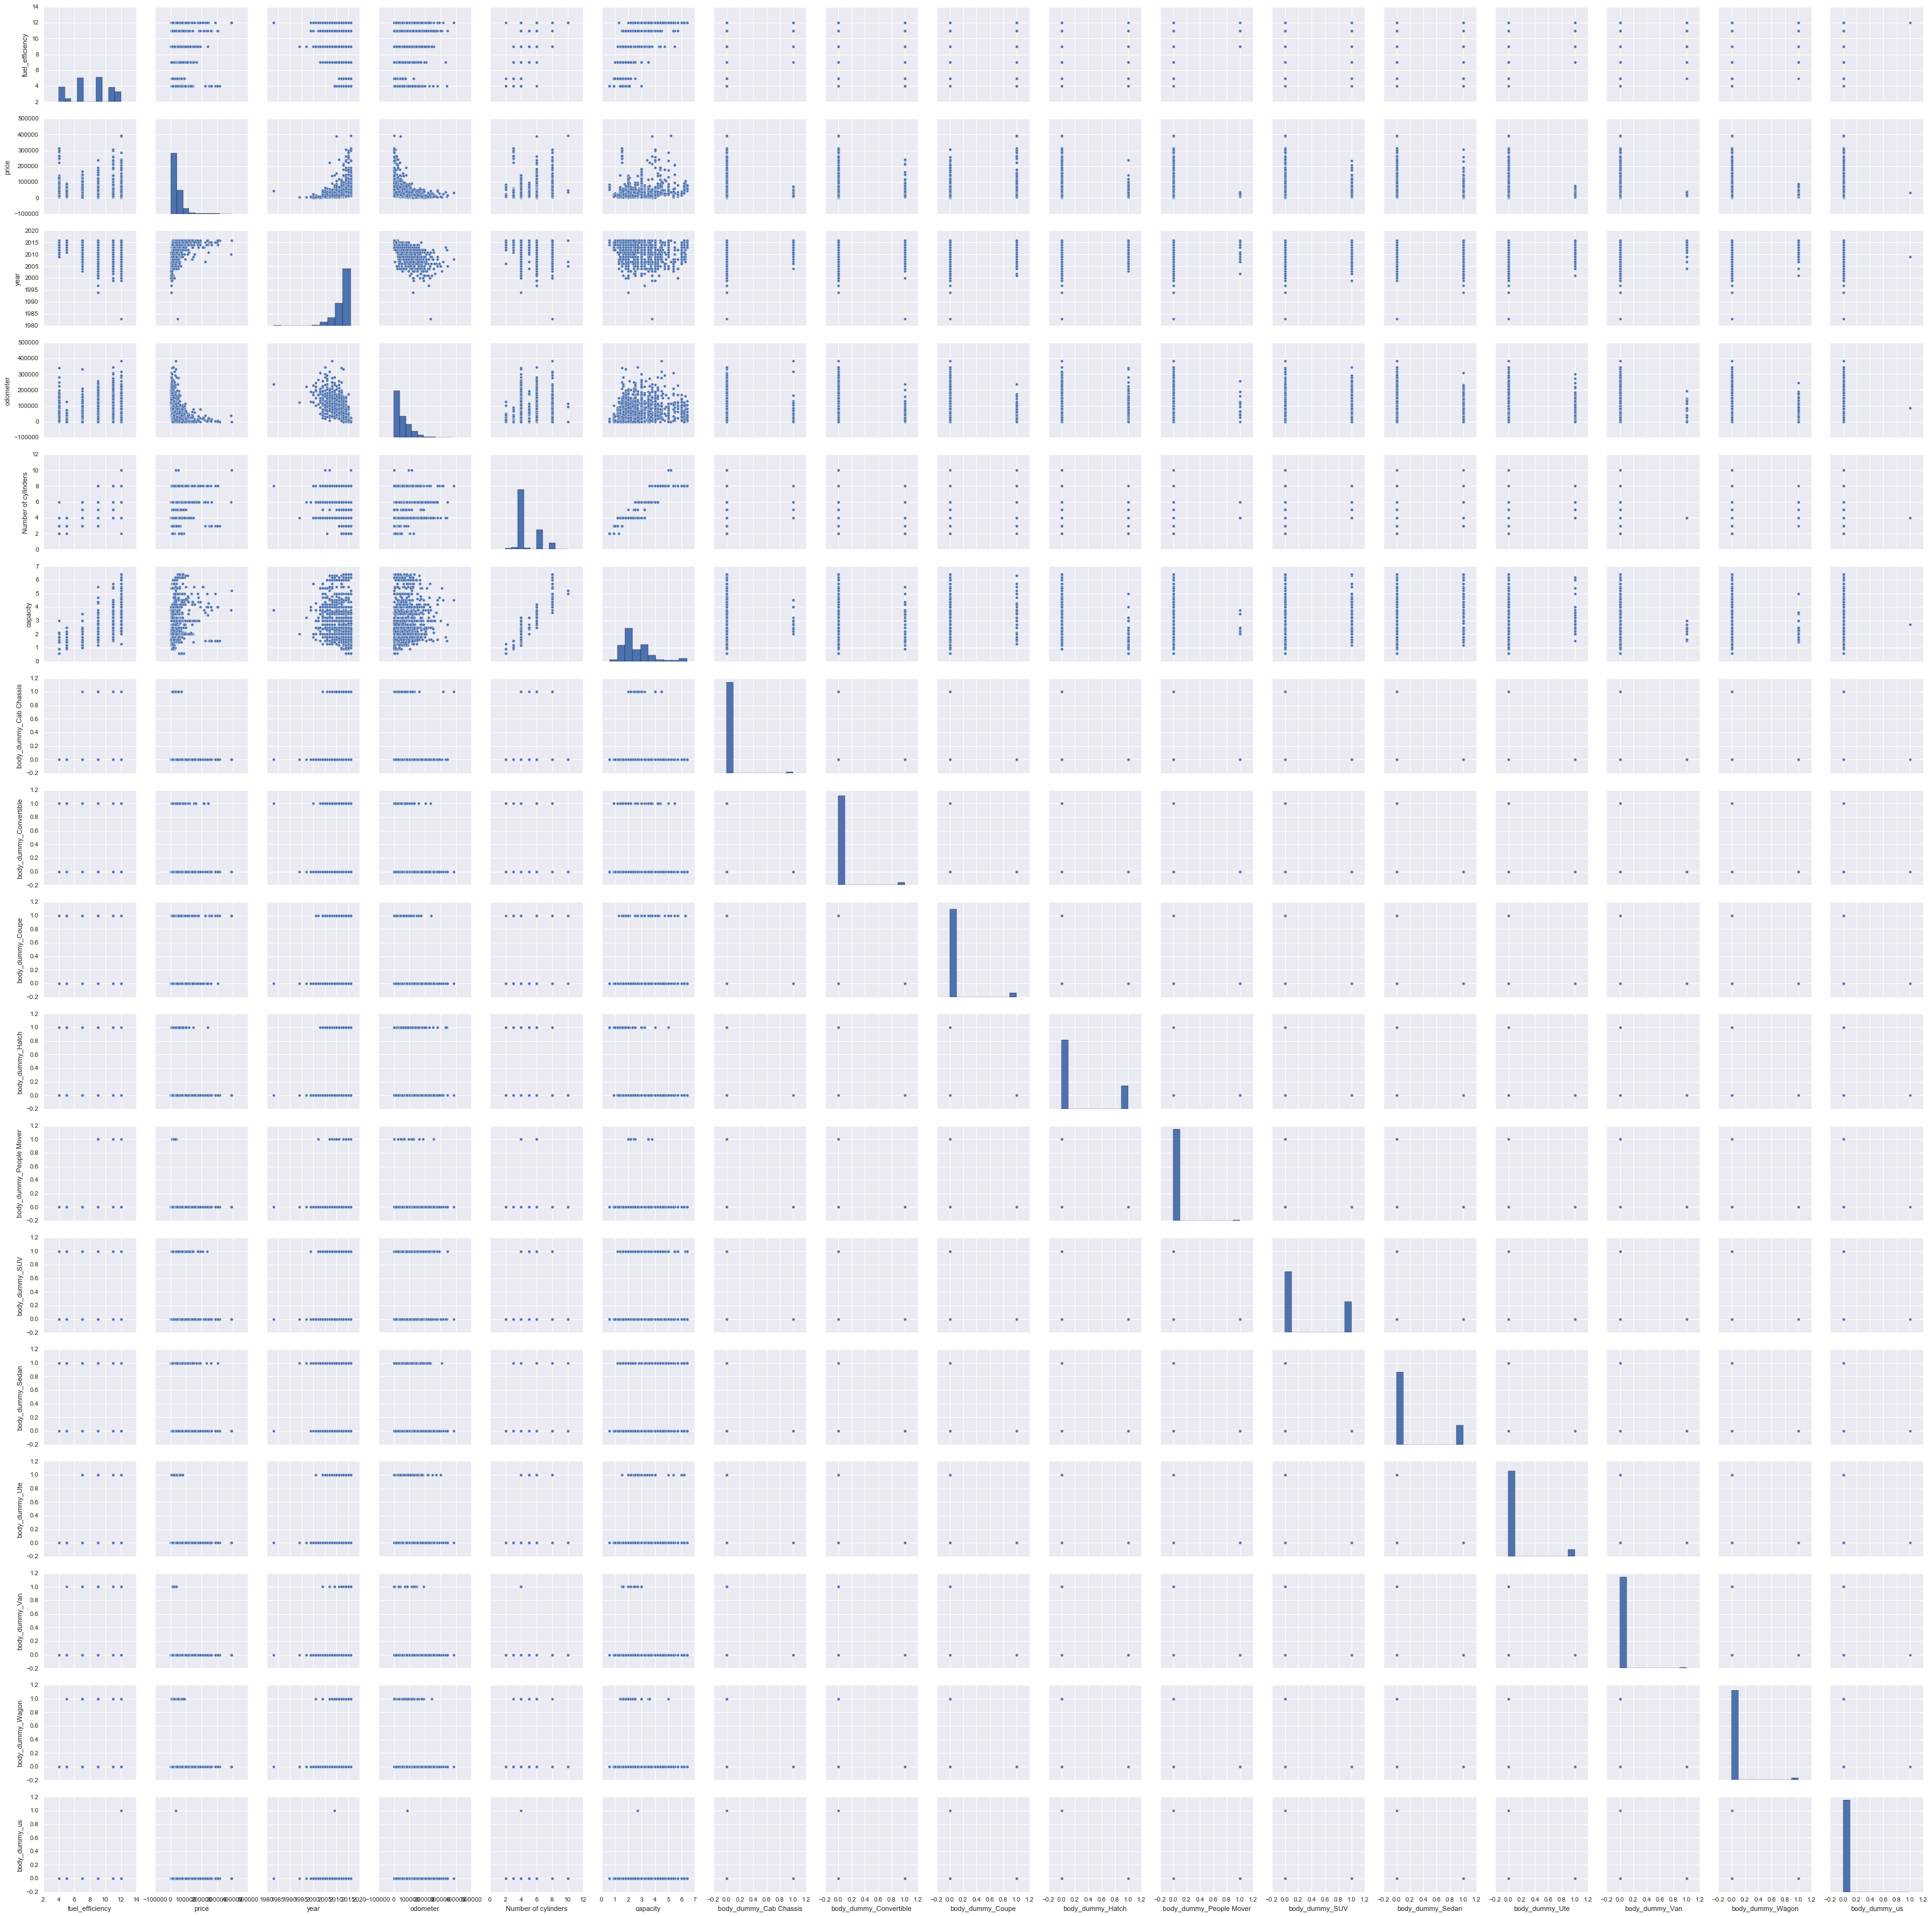

In [141]:
sns.pairplot(body_dummies)

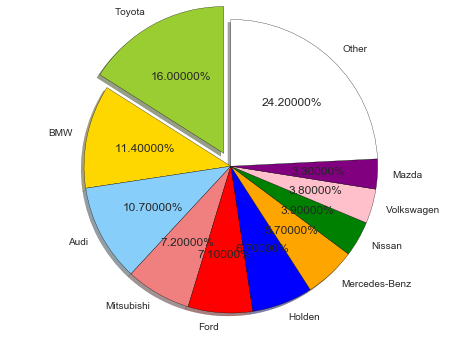

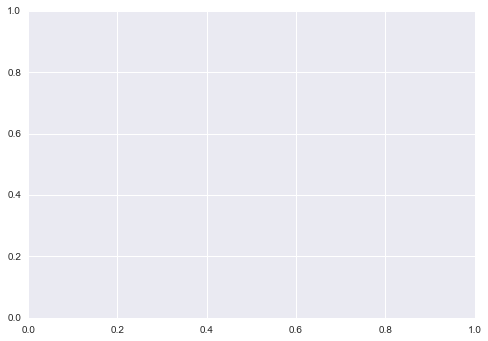

In [84]:
"""
Demo of a basic pie chart plus a few additional features.

In addition to the basic pie chart, this demo shows a few optional features:

    * slice labels
    * auto-labeling the percentage
    * offsetting a slice with "explode"
    * drop-shadow
    * custom start angle

Note about the custom start angle:

The default ``startangle`` is 0, which would start the "Frogs" slice on the
positive x-axis. This example sets ``startangle = 90`` such that everything is
rotated counter-clockwise by 90 degrees, and the frog slice starts on the
positive y-axis.
"""
import matplotlib.pyplot as plt

# The slices will be ordered and plotted counter-clockwise.
labels = 'Toyota', 'BMW', 'Audi', 'Mitsubishi', 'Ford', 'Holden', "Mercedes-Benz", "Nissan", "Volkswagen","Mazda", 'Other'
sizes = [16, 11.4, 10.7, 7.2, 7.1, 6.7, 5.7, 3.9, 3.8, 3.3, 24.2]

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red', 'blue', 'orange', 'green', 'pink', 'purple', 'white']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%.05f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

fig = plt.figure()
ax = fig.gca()
"""import numpy as np

ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 0), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(1, 1), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(0, 1), frame=True)
ax.pie(np.random.random(4), explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.25, center=(1, 0), frame=True)

ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(["Sunny", "Cloudy"])
ax.set_yticklabels(["Dry", "Rainy"])
ax.set_xlim((-0.5, 1.5))
ax.set_ylim((-0.5, 1.5))

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax.set_aspect('equal')"""

plt.show()

Linear regression

In [168]:
columns = ['odometer',"body_dummy_Convertible","body_dummy_Coupe","body_dummy_Hatch","body_dummy_People Mover","body_dummy_SUV","body_dummy_Sedan","body_dummy_Ute","body_dummy_Van","body_dummy_Wagon"]
cars_X = body_dummies[columns]
cars_X_train = cars_X[:-200]
cars_X_test = cars_X[-200:]
cars_y = body_dummies.price
cars_y_train = body_dummies.price[:-200]
cars_y_test = body_dummies.price[-200:]

In [169]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(cars_X_train, cars_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

('Coefficients: \n', array([ -2.39264771e-01,   2.29990336e+04,   4.60326042e+04,
        -7.04428543e+03,   4.40652974e+03,   1.32800698e+04,
         8.18008478e+03,   6.61050264e+03,  -1.63360508e+03,
         6.72435865e+03]))
Mean squared error: 1599746092.45
Variance score: 0.24


ValueError: x and y must be the same size

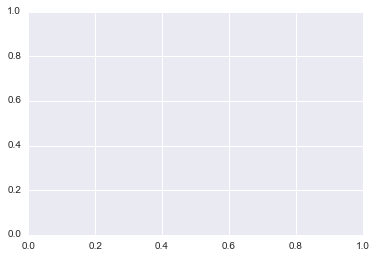

In [170]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(cars_X_test) - cars_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(cars_X_test, cars_y_test))

# Plot outputs
plt.scatter(cars_X, body_dummies.price, color = 'red')
plt.scatter(cars_X_test, cars_y_test,  color='black')
plt.plot(cars_X_test, regr.predict(cars_X_test), color='blue',
         linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

Let's try to visualize car selling on the map

In [ ]:
# Import the basemap package
from mpl_toolkits.basemap import Basemap

# Create a map on which to draw.  We're using a mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.
m.drawcoastlines()
m.drawmapboundary()
# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))
# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.
plt.show()

Picking particular good plots from Seaborn

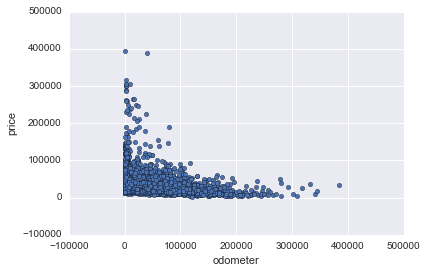

In [185]:
body_dummies.reset_index
body_dummies.plot.scatter('odometer', 'price')

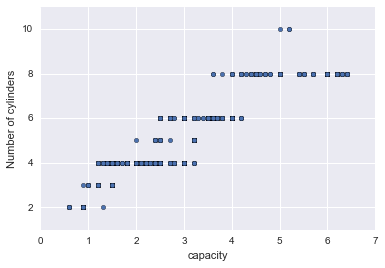

In [210]:
body_dummies.plot.scatter('capacity', 'Number of cylinders')

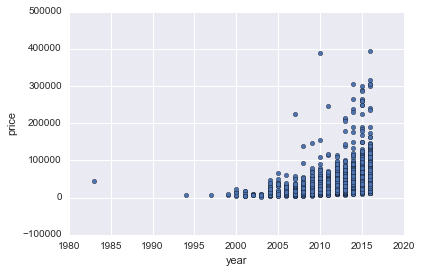

In [211]:
body_dummies.plot.scatter('year', 'price')

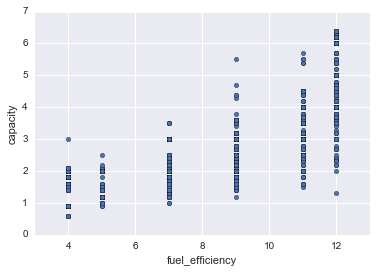

In [217]:
body_dummies.plot.scatter('fuel_efficiency', 'capacity')

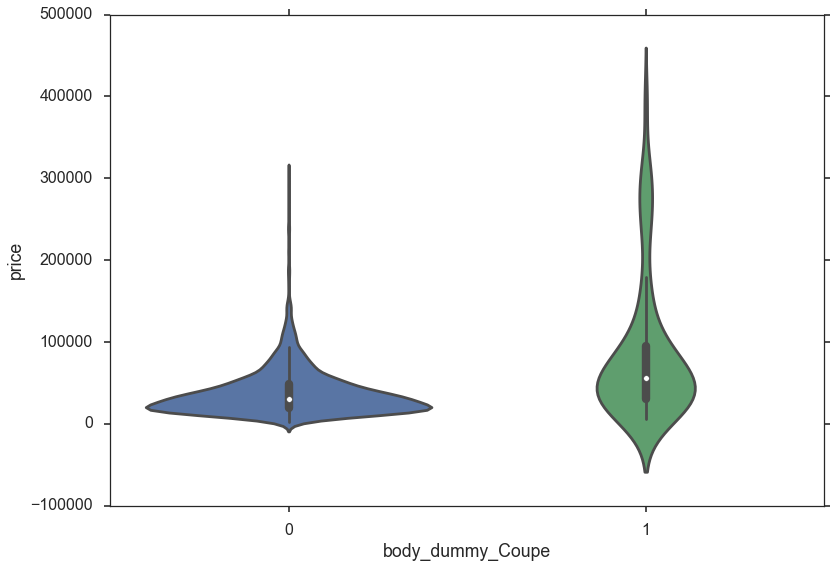

In [228]:
sns.violinplot(y='price', x='body_dummy_Coupe',   data=body_dummies)

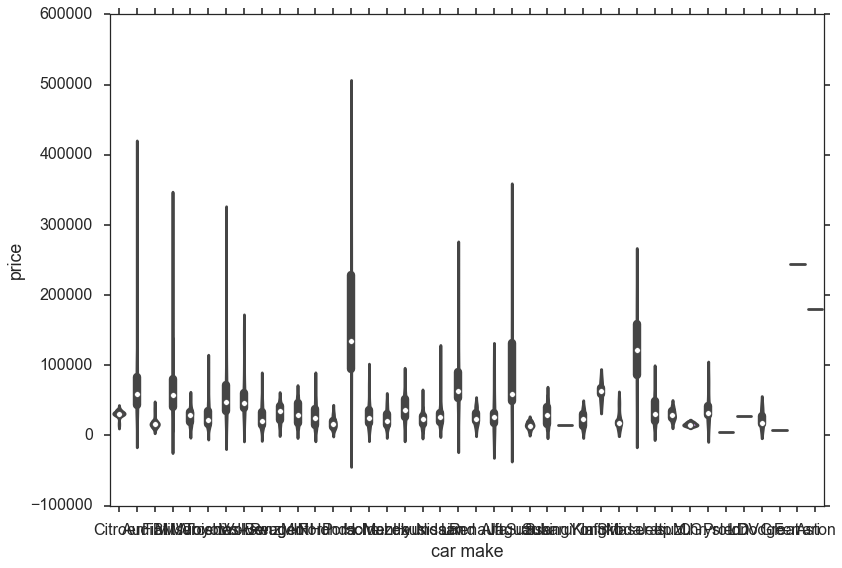

In [230]:
sns.violinplot(y='price', x='car make',   data=body_dummies)

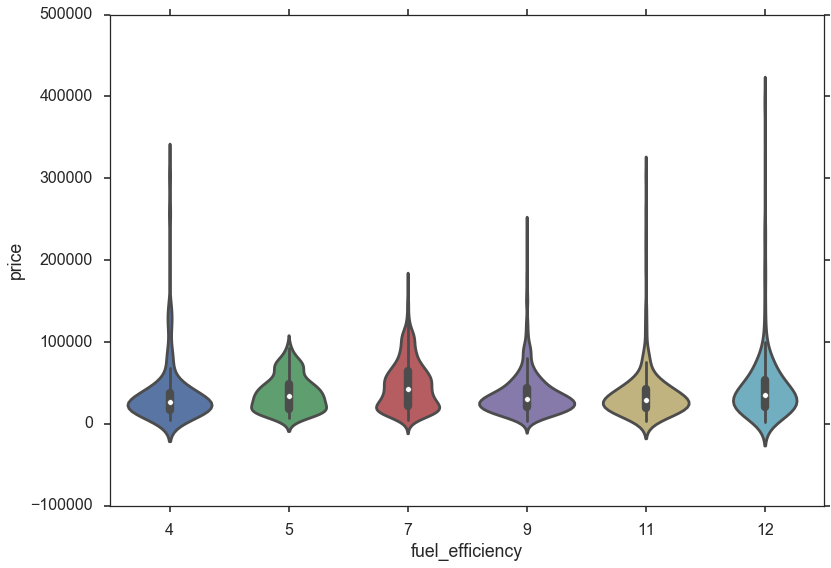

In [229]:
sns.violinplot(y='price', x='fuel_efficiency',   data=body_dummies)

In [188]:
body_dummies.corr()

,fuel_efficiency,price,year,odometer,Number of cylinders,capacity,body_dummy_Cab Chassis,body_dummy_Convertible,body_dummy_Coupe,body_dummy_Hatch,body_dummy_People Mover,body_dummy_SUV,body_dummy_Sedan,body_dummy_Ute,body_dummy_Van,body_dummy_Wagon,body_dummy_us
fuel_efficiency,1.000000,-0.005104,-0.382246,0.359213,0.619098,0.712716,0.101767,0.011618,0.021055,-0.502781,0.058421,0.131842,0.168569,0.220654,0.041244,0.022760,0.027476
price,-0.005104,1.000000,0.349844,-0.356435,0.263397,0.205220,-0.036536,0.083299,0.281977,-0.225488,-0.031351,0.110517,-0.007317,-0.051250,-0.036180,-0.011336,-0.004594
year,-0.382246,0.349844,1.000000,-0.781987,-0.282250,-0.278190,-0.030099,-0.074132,-0.040707,0.077167,-0.049274,0.078533,-0.095398,-0.016609,0.011731,-0.001046,-0.022577
odometer,0.359213,-0.356435,-0.781987,1.000000,0.226298,0.261757,0.068940,-0.030349,-0.036403,-0.083511,0.060633,-0.007167,0.027767,0.096533,0.024167,0.010507,0.013264
Number of cylinders,0.619098,0.263397,-0.282250,0.226298,1.000000,0.901489,0.013387,-0.001414,0.047090,-0.342830,-0.001456,0.127444,0.179544,0.051794,-0.052560,-0.026762,-0.009887
capacity,0.712716,0.205220,-0.278190,0.261757,0.901489,1.000000,0.052643,-0.018234,0.016697,-0.436816,0.015188,0.117052,0.195309,0.206040,-0.026224,-0.025466,0.003336
body_dummy_Cab Chassis,0.101767,-0.036536,-0.030099,0.068940,0.013387,0.052643,1.000000,-0.018893,-0.024024,-0.063046,-0.007840,-0.077586,-0.056512,-0.030455,-0.010736,-0.017100,-0.002019
body_dummy_Convertible,0.011618,0.083299,-0.074132,-0.030349,-0.001414,-0.018234,-0.018893,1.000000,-0.038328,-0.100581,-0.012508,-0.123779,-0.090157,-0.048588,-0.017128,-0.027281,-0.003222
body_dummy_Coupe,0.021055,0.281977,-0.040707,-0.036403,0.047090,0.016697,-0.024024,-0.038328,1.000000,-0.127897,-0.015905,-0.157395,-0.114641,-0.061783,-0.021779,-0.034690,-0.004097
body_dummy_Hatch,-0.502781,-0.225488,0.077167,-0.083511,-0.342830,-0.436816,-0.063046,-0.100581,-0.127897,1.000000,-0.041738,-0.413043,-0.300847,-0.162134,-0.057153,-0.091034,-0.010751


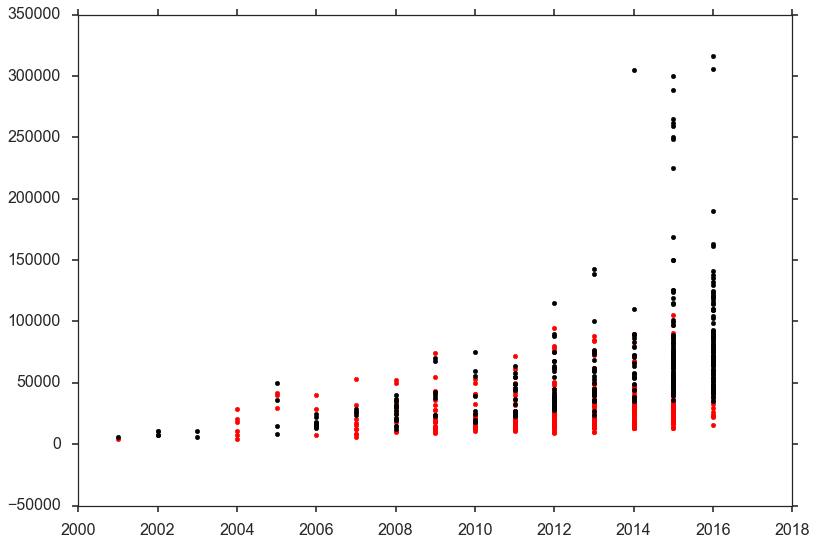

In [249]:
toyota = body_dummies[body_dummies['car make'] == 'Toyota']
bmw = body_dummies[body_dummies['car make'] == 'BMW']

plt.scatter(toyota.year, toyota.price, color = 'red')
plt.scatter(bmw.year, bmw.price,  color='black')


#plt.xticks(())
#plt.yticks(())

plt.show()

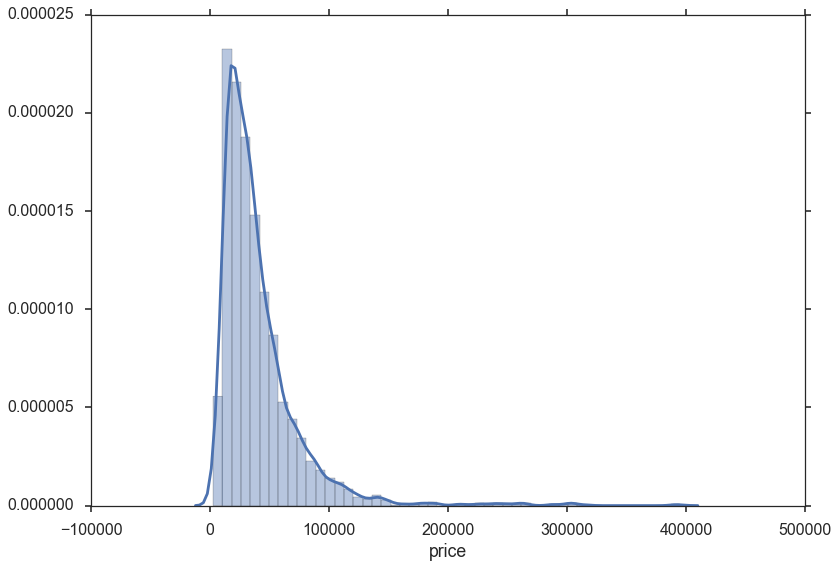

In [248]:

sns.distplot(body_dummies.price)

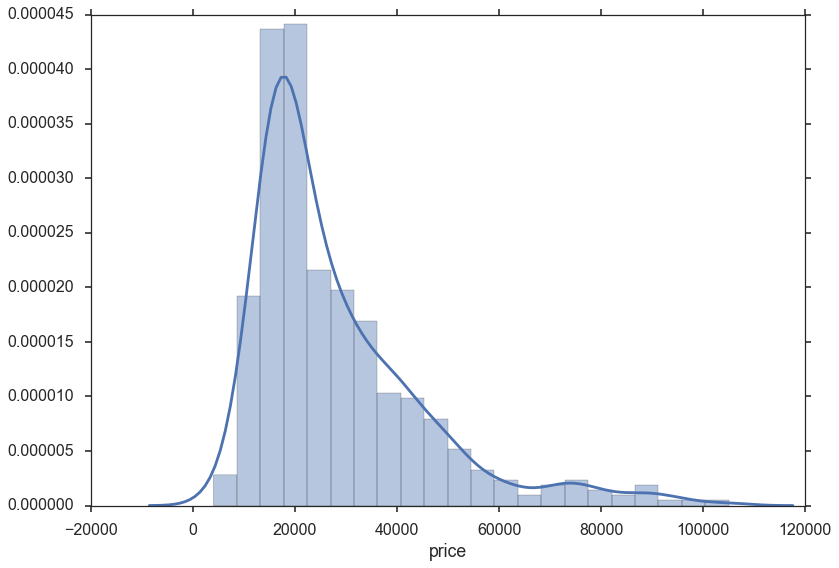

In [250]:
sns.distplot(toyota.price)

In [254]:
from bokeh.charts import Scatter, output_file, show
from bokeh.sampledata.autompg import autompg as df

p = Scatter(body_dummies, x='year', y='price', color='car make',
            title="HP vs DISPL (shaded by CYL)", legend="top_left",
            legend_sort_field = 'color',
            legend_sort_direction = 'ascending',
            xlabel="Displacement",
            ylabel="Horsepower")

output_file("scatter.html")

show(p)

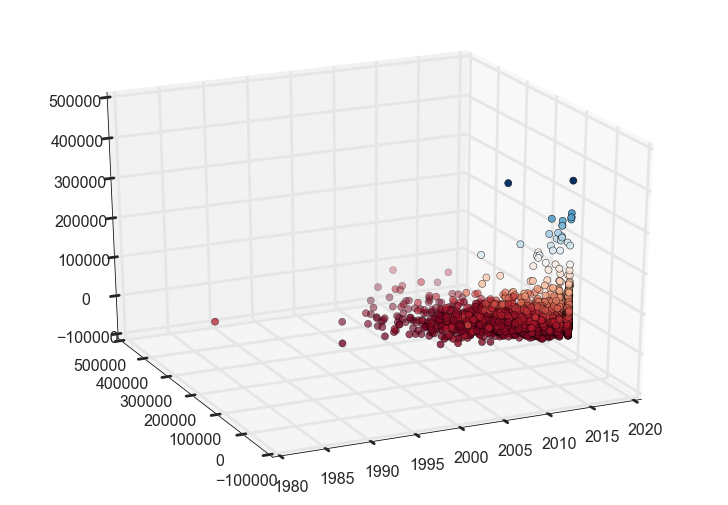

In [245]:
#(Optional) Can you make a 3D plot to show whether they are effective?
import mpl_toolkits.mplot3d
import numpy
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
def normalised_bath_colour(x):
    return x / 3.0

ax.scatter(body_dummies.year, body_dummies.odometer, body_dummies.price,
           s=50,
           cmap=plt.cm.RdBu,
           c=body_dummies.price.map(normalised_bath_colour))
ax.view_init(25, 245)

Try to compare expensive cars and cheap cars

In [ ]:
expensive_houses = sacramento[sacramento.price > 250000]
cheap_houses = sacramento[sacramento.price <= 250000]
matplotlib.pyplot.scatter(expensive_houses.longitude,
                          expensive_houses.latitude,
                          color='red')
matplotlib.pyplot.scatter(cheap_houses.longitude,
                          cheap_houses.latitude,
                          color='blue')

Try this (find ratio between columns):

In [ ]:
sacramento['bed_bath_ratio'] = sacramento.beds / sacramento.baths
sacramento.dropna(inplace=True)
data_columns.append('bed_bath_ratio')

In [ ]:
import sklearn.preprocessing
robust_x = sklearn.preprocessing.RobustScaler()
robust_y = sklearn.preprocessing.RobustScaler()
scaled_q1 = robust_x.fit_transform(analysis_dataframe[q1_columns])
scaled_2015total = robust_y.fit_transform(analysis_dataframe[[('Dollars', 'TotalDollars2015')]])